# DS3: Data Visualization Workshop at DataHack!

Welcome to our visualization workshop! We will mainly go through how we can visualize messy data in the real world from basic to advaced. 

Feel free to skip some sections if you already know how to do it!

## Setting up your environment
If you have not done so, download Anaconda on your computer from [here](https://www.anaconda.com/distribution/).

## Import libraries

In [1]:
# pandas is useful for manipulating data
import pandas as pd
# numpy is useful for calculation
import numpy as np
# matplotlib is useful for visualization
import matplotlib.pyplot as plt

Pandas and matplotlib are one of the most popular Python libraries.

- [Pandas](https://pandas.pydata.org/pandas-docs/stable/): library for data manipulations
- [Matplotlib](https://matplotlib.org/contents.html): library for data visualization

These are very useful for data science projects.

# 1. Cars
First, we will look into cars.csv, which has data about cars. Let's visualize the dataset to analyze!

In [2]:
# import data from .csv
df = pd.read_csv("cars.csv")
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Barplot

Barplot is useful for visualizing categorical values. Here, we will look at how many cars there are with each car brand.

<Figure size 28800x7200 with 0 Axes>

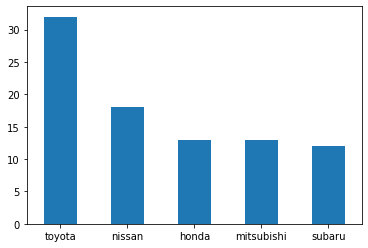

<Figure size 28800x7200 with 0 Axes>

In [3]:
# show the top five cars in the datasets
df.make.value_counts().head().plot.bar(rot=0)
plt.figure(figsize=(400,100))

We have the most data for toyota, nissan, mitsubishi, honda and volkswagen in order.

## Histogram
### Q1: How can we visualize the distribution of the car prices?
We want to know how much prices vary among cars. Then how can we do it? 

Histogram is useful for deviding up numerical values into small sections, and see each count. Let's use this one.

There are a number of ways to plot a histogram, but the easiest one to do is using a built-in function in pandas. Google how you can make a histogram out of pandas Data Frame.

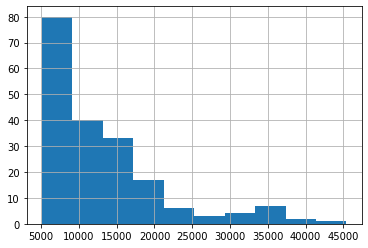

In [4]:
df.price.hist()

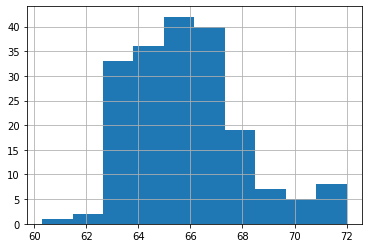

In [5]:
df.width.hist(bins=10)

If you have successfully completed Q1, you can see that most car prices are below $10,000.

### Q1.1: Earlier, we saw that there are most data for toyota. Can we plot the distribution of prices for toyota cars?

Hint: You can create a new data frame that contains only toyota cars. Look up online how to get data for corresponding categorical value.

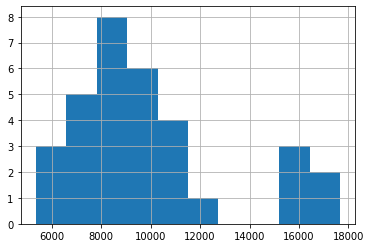

In [6]:
df[df["make"] == "toyota"].price.hist()

In [7]:
# df[df["make"] == "toyota"]

## Scatterplot
### Q2: Then, how do prices vary? How can we plot data points of prices against horsepower?
Now, we have seen that there are huge differences in car prices. Then, let's figure out how car prices relate to horsepowers!

Scatter plot is useful for plotting points with two different variables. So we can use this one.

Again, there are some ways to do it, but the easiest one is to use the built-in function in Pandas Data Frame.


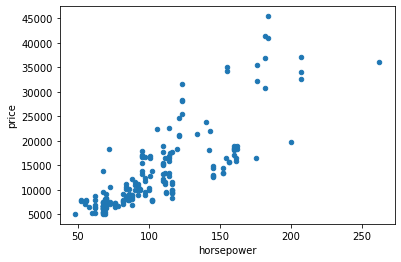

In [8]:
df.plot(kind = "scatter", x = "horsepower", y = "price")

If you did it correctly, you can see that the more horsepower a car has, the pricer the car is.

### Q3 (Advanced): Maybe the number of doors matter for car prices because small cars with 2 doors should be pricer than casrs with 4 doors. How can we change colors of the dots with different number of doors?

Assumption here is that a sport-car-type car that has only two doors should be expensive. How can we plot different colors?

A solution to this kind of problem is googling a right question, such as "scatterplot pandas dataframe with different colors" etc. Or even read documentation of [pandas](https://pandas.pydata.org/pandas-docs/stable/) or [matplotlib](https://matplotlib.org/3.1.1/contents.html). Again, there are a number of ways to do this. Keep searching and find a solution!

Hint:
- [scikit-learn](https://scikit-learn.org/stable/documentation.html) has label encoder that is helpful for using different colors.
- matplotlib (or plt) also has scatter plot function.

/Users/yabutamidori/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


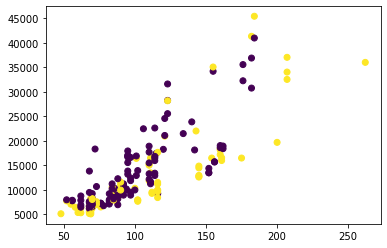

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
plt.scatter(df["horsepower"],
           df["price"],
           c=le.fit_transform(df[["num-of-doors"]]))

### Q3.1(Advanced): Can we plot data points with 2 doors and 4 doors for toyota cars?
Hint: Create a new data frame for toyota cars as you did before. Plotting part is exactly the same as Q3.

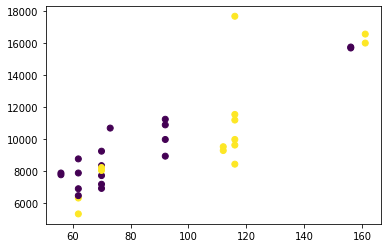

In [10]:
toyota = df[df["make"] == "toyota"]
plt.scatter(toyota["horsepower"],
           toyota["price"],
           c=le.fit_transform(toyota[["num-of-doors"]]))

### Q4(Advanced): Plot the prices of cars against other numerical values (engine-size etc.) to figure out which varibable seems to infulence the price of a car the most.

# 2. Words
## WordCloud

Let's look at different kinds of data: words. WordCloud allows us to visualize what words are prevelent in data. Maybe you have seen it too.

Here is the simplest way to visualize "Hello World!"

In [11]:
!pip install wordcloud

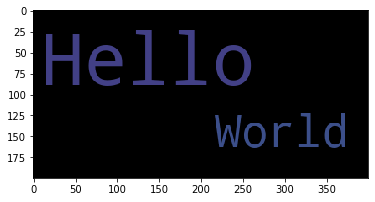

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text = "Hello Hello Hello Hello World!")
plt.imshow(wordcloud)
plt.show()

### Q4: How can we visualize words in Independence.txt?
Our next task is to visualize datat in the given text file. 

Hint: You can use python's built-in function to read texts.

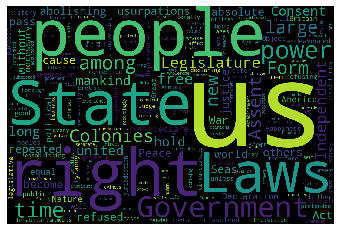

In [14]:
file_content=open ("independence.txt").read()

wordcloud = WordCloud(width=1080, height=720).generate(text = file_content)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()